### ASTROINFORMATICS, Fall 2018
https://github.com/astromundus/astroinformatics/lectures-notebooks/Week-2-1.ipynb

# Week 2  Introduction to Probability & Statistics. 

##### Resources for this notebook include:

- [Textbook](http://press.princeton.edu/titles/10159.html) Chapters 3 and 4.  
- [Gordon Richard's notebooks](https://github.com/gtrichards/PHYS_T480)
- random contributions from a large number of colleagues (e.g. Jake VanderPlas, Andy Connolly)

##### Suggested supplemental background reading:

[David Hogg: "Data analysis recipes: Probability calculus for inference"](https://arxiv.org/abs/1205.4446)

##### Learning goals for Week 2 (mostly based on Chapter 3 material): 

- Probability Rules (notation, definitions, conditional probability, Bayes Rule).
- How do I robustly estimate location and scale parameters of a one-dimensional data set?  
- Statistical distributions and how do we describe them? 
- Estimators, location and scale, sample vs. population, bias and scatter.


- How do I use python to generate various statistical distributions, such as Cauchy, Laplace, etc.  
- The Central Limit Theorem. 
- Robust estimators. 
- How do I robustly estimate parameters of a two-dimensional Gaussian?  
- Bivariate and Multivariate Distribution Functions.  
- How do we make a histogram and why? How do we choose optimal bin width?
  Do histogram bins need to be same size?  

## Notation

### Variables

First we need to go over some of the notation that the book uses.   

$x$ is a scalar quantity, measured $N$ times

$x_i$ is a single measurement with $i=1,...,N$

$\{x_i\}$ refers to the set of all N measurements

### Population vs Empirical PDF

We are generally trying to *estimate* $h(x)$, the *true* distribution from which the values of $x$ are drawn. We will refer to $h(x)$ as the probability density (distribution) function or the "pdf" and $h(x)dx$ is the propobability of a value lying between $x$ and $x+dx$. 

While $h(x)$ is the "true" pdf (or **population** pdf).  What we *measure* from the data is the **empirical** pdf, which is denoted $f(x)$.  So, $f(x)$ is a *model* of $h(x)$.  In principle, with infinite data $f(x) \rightarrow h(x)$, but in reality measurement errors keep this from being strictly true.

### Parametric vs. Non-parametric

If we are attempting to guess a *model* for $h(x)$, then the process is *parametric*.  With a model solution we can generate new data that should mimic what we measure.

If we are not attempting to guess a model, then the process is *nonparametic*.  That is we are just trying to describe the data that we see in the most compact manner that we can, but we are not trying to produce mock data.

## Probability

The probability of $A$, $p(A)$, is the probability that some event will happen (say a coin toss), or if the process is continuous, the probability of $A$ falling in a certain range.  (N.B., Technically these two things are different and sometimes are indicated by $P$ and $p$, but we'll ignore that here).

$p(A)$ must be positive definite for all $A$ and the sum/integral of the pdf must be unity.

If we have two events, $A$ and $B$, the possible combinations are illustrated by the following figure:
![Figure 3.1](http://www.astroml.org/_images/fig_prob_sum_1.png)

$A \cup B$ is the *union* of sets $A$ and $B$.

$A \cap B$ is the *intersection* of sets $A$ and $B$.

The probability that *either* $A$ or $B$ will happen (which could include both) is the *union*, given by

$$p(A \cup B) = p(A) + p(B) - p(A \cap B)$$

The figure makes it clear why the last term is necessary.  Since $A$ and $B$ overlap, we are double-counting the region where *both* $A$ and $B$ happen, so we have to subtract this out.  


The probability that *both* $A$ and $B$ will happen, $p(A \cap B)$, is 

$$p(A \cap B) = p(A|B)p(B) = p(B|A)p(A)$$

where p(A|B) is the probability of A *given that* B is true and is called the *conditional probability*.  So the $|$ is short for "given that".

In other words: *"The probability that both A and B have occured is equal to the probability B has occured times the probability that A will occur if B occured".*

If events B_i are disjoint and their union is the set of all possible outcomes, then the **law of total probability** says that:

$$p(A) = \sum_ip(A|B_i)p(B_i)$$

Example:

    A = hit head on door frame, B = { is tall, is average, is short }
    P(A) = P(A|is tall) + P(B|is average) + P(C|is short)

N.B.  Just to be annoying, different people use different notation and the following all mean the same thing

$$p(A \cap B) = p(A,B) = p(AB) = p(A \,{\rm and}\, B)$$

We will use the comma notation as in the textbook.

It is important to realize that the following is *always* true
$$p(A,B) = p(A|B)p(B) = p(B|A)p(A)$$

However, if $A$ and $B$ are ***independent***, then 

$$p(A,B) = p(A)p(B)$$

Example:

     John is successful and John is a Libra.
     
In other words, ***knowing A happened tells us nothing about whether B happened (or will happen), and vice versa***.

Let's look at another example.

If you have a bag with 5 marbles, 3 yellow and 2 blue and you want to know the probability of picking 2 yellow marbles in a row, that would be

$$p(Y_1,Y_2) = p(Y_1)p(Y_2|Y_1).$$

$p(Y_1) = \frac{3}{5}$ since you have an equally likely chance of drawing any of the 5 marbles.

If you did not put the first marble back in the back after drawing it (sampling *without* "replacement"), then the probability
$p(Y_2|Y_1) = \frac{2}{4}$, so that
$$p(Y_1,Y_2) = \frac{3}{5}\frac{2}{4} = \frac{3}{10}.$$

But if you put the first marble back, then
$p(Y_2|Y_1) = \frac{3}{5} = p(Y_2)$, so that 
$$p(Y_1,Y_2) = \frac{3}{5}\frac{3}{5} = \frac{9}{25}.$$

In the first case $A$ and $B$ (or rather $Y_1$ and $Y_2$) are *not* independent, whereas in the second case they are.

Here is a more complicated example from 
[Jo Bovy's class at UToronto](http://astro.utoronto.ca/%7Ebovy/teaching.html)
![Bovy_L1-StatMiniCourse_page21](figures/Bovy_L1-StatMiniCourse_page21.png)

As illustrated, 
$$p(A \,{\rm or}\, B|C) = p(A|C) + p(B|C) - p(A \, {\rm and}\, B|C)$$ 

This illustration also explains why $$p(x|y)p(y) = p(y|x)p(x)$$ (used below),
or in the notation of this figure: $$p(A \, {\rm and}\, B) \equiv p(A,B) = p(A|B)p(B) = p(B|A)p(A)$$



Need more help with this?  Try watching some Khan Academy videos and working through the exercises:
[https://www.khanacademy.org/math/probability/probability-geometry](https://www.khanacademy.org/math/probability/probability-geometry)

[https://www.khanacademy.org/math/precalculus/prob-comb](https://www.khanacademy.org/math/precalculus/prob-comb)

## Bayes' Rule

We've seen that the probability of $x$ and $y$ occurring can be written as:

$$p(x,y) = p(x|y)p(y) = p(y|x)p(x)$$

. We can define the ***marginal probability*** as

$$p(x) = \int p(x,y)dy,$$

where marginal means the probability of $x$ occurring irrespective what $y$ is. This is essentially projecting on to one axis (integrating over the other axis, see the figure in the Notebook, below).

Given these two, we can write:

$$p(x) = \int p(x|y)p(y) dy$$

This is just the law of total probability, but for continous variables.

## Marginal and contitional probability distributions

In the following figure, we have a 2-D distribution in $x-y$ parameter space.  Here $x$ and $y$ are *not* independent as, once you pick a $y$, your values of $x$ are constrained.

The *marginal* distributions are shown on the left and bottom sides of the left panel.  As the equation above says, this is just the integral along the $x$ direction for a given $y$ (left side panel) or the integral along the $y$ direction for a given $x$ (bottom panel).  

The three panels on the right show the *conditional* probability (of $x$) for three $y$ values: $$p(x|y=y_0)$$  These are just "slices" through the 2-D distribution.

![http://www.astroml.org/_images/fig_conditional_probability_1.png](http://www.astroml.org/_images/fig_conditional_probability_1.png)

Then, again starting with:

$$p(x|y)p(y) = p(y|x)p(x)$$

we can write:

$$p(y|x) = \frac{p(x|y)p(y)}{p(x)} = \frac{p(x|y)p(y)}{\int p(x|y)p(y) dy}$$

which in words says that

> the (conditional) probability of $y$ given $x$ is just the (conditional) probability of $x$ given $y$ times the (marginal) probability of $y$ divided by the (marginal) probability of $x$, where the latter is just the integral of the numerator.

This is **Bayes' rule**, which itself is not at all controversial, though its application can be as we'll discuss later (Week 4).

## Example: Lego's 

An example with Lego's (it's awesome):
[https://www.countbayesie.com/blog/2015/2/18/bayes-theorem-with-lego](https://www.countbayesie.com/blog/2015/2/18/bayes-theorem-with-lego)

## Example: Monty Hall Problem

You are playing a game show and are shown 2 doors.  One has a car behind it, the other a goat.  What are your chances of picking the door with the car?


OK, now there are 3 doors: one with a car, two with goats.  The game show host asks you to pick a door, but not to open it yet.  Then the host opens one of the other two doors (that you did not pick), making sure to select one with a goat.  The host offers you the opportunity to switch doors.  Do you?
 
 
![https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/180px-Monty_open_door.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/180px-Monty_open_door.svg.png)





Now you are back at the 2 door situation.  But what can you make of your prior information?

$p(1{\rm st \; choice}) = 1/3$

Try it:
https://betterexplained.com/articles/understanding-the-monty-hall-problem/

$p({\rm other}) = 2/3$
which doesn't change after host opens door without the prize.
So, switching doubles your chances.  But only because you had prior information.  If someone walked in after the "bad" door was opened, then their probability of winning is the expected $1/2$.




![TextbookGrab1](figures/grab1.jpg)




For $N$ choices, revealing $N-2$ "answers" doesn't change the probability of your choice.  It is still $\frac{1}{N}$.  But it *does* change the probability of your knowledge of the *other* remaining choice by $N-1$ and it is $\frac{N-1}{N}$. Therefore, by switching, you increase your chance of winning by a factor of (N-1). 

In the 3-door example, you double your chance of winning (from 1/3 to 2/3). 

This is an example of the use of *conditional* probability, where we have $p(A|B) \ne p(A)$.

## Example: Contingency Table

We can also use Bayes' rule to learn something about false positives and false negatives.

Let's say that we have a test for a disease.  The test can be positive ($T=1$) or negative ($T=0$) and one can either have the disease ($D=1$) or not ($D=0$).  So, there are 4 possible combinations:
$$T=0; D=0 \;\;\;  {\rm true \; negative}$$
$$T=0; D=1 \;\;\; {\rm false \; negative}$$
$$T=1; D=0 \;\;\; {\rm false \; positive}$$
$$T=1; D=1 \;\;\; {\rm true \; positive}$$

All else being equal, you have a 50% chance of being misdiagnosed.  Not good!  But the probability of disease and the accuracy of the test presumably are not random.

If the rates of false positive and false negative are:
$$p(T=1|D=0) = \epsilon_{\rm FP}$$
$$p(T=0|D=1) = \epsilon_{\rm FN}$$

then the true positive and true negative rates are just:
$$p(T=0| D=0) = 1-\epsilon_{\rm FP}$$
$$p(T=1| D=1) = 1-\epsilon_{\rm FN}$$

Let's assume that $\epsilon_{\rm FP}=0.02$ and $\epsilon_{\rm FN}=0.001$. 

In graphical form this 2x2 p(T=0 or 1|D=0 or 1) matrix is:
![http://www.astroml.org/_images/fig_contingency_table_1.png](http://www.astroml.org/_images/fig_contingency_table_1.png)

If we have a **prior** regarding how likely the disease is, we can take this into account.

$$p(D=1)=\epsilon_D$$

and then $p(D=0)=1-\epsilon_D$. Say, $\epsilon_D = 0.01$. 

Now assume that a person tested positive. What is the probability that this person has the disease? Is it 98% 
because $\epsilon_{\rm FP}=0.02$?

We can't just read $p(D=1|T=1)$ off the table because the table entry is the conditional probability of the *test* given the *data*, $p(T=1|D=1)$. What we want is the conditional probability of the *data* given the *test*, that is, $p(D=1|T=1)$.

Bayes' rule then can be used to help us determine how likely it is that you have the disease if you tested positive:

$$p(D=1|T=1) = \frac{p(T=1|D=1)p(D=1)}{p(T=1)},$$

where $$p(T=1) = p(T=1|D=0)p(D=0) + p(T=1|D=1)p(D=1).$$

Therefore:

$$p(D=1|T=1) = \frac{(1 - \epsilon_{FN})\epsilon_D}{\epsilon_{FP}(1-\epsilon_D) + (1-\epsilon_{FN})\epsilon_D} \approx \frac{\epsilon_D}{\epsilon_{FP}+\epsilon_D}$$

That means that to get a reliable diagnosis, we need $\epsilon_{FP}$ to be quite small.  (Because you *want* the probability to be close to unity if you test positive, otherwise it is a *false* positive).

In our example, we have a disease rate of 1% ($\epsilon_D = 0.01$) and a false positive rate of 2% ($\epsilon_{\rm FP}=0.02$).  

So we have:
$$p(D=1|T=1) = \frac{0.01}{0.02+0.01} = 0.333$$

Then in a sample of, e.g.,  1000 people, 10 people test positive and *actually* have the disease $(1000*0.01)$, but another 20 $(1000*0.02)$ will test positive while healthy!

Therefore, in that sample of 30 people who tested positive, only 1/3 has the disease (not 98%!). 

Same math, with often surprising results, applies to DNA tests of murder suspects... (more about this later in the course).

## Descriptive statistics

Typically, we collect some *samples* (series of measurements, or catalogs of stars) that can be thought of as being drawn from som underlying distribution (e.g., distribution of errors, or the distribution of stars in the Milky Way).

We often don't care much about the individual samples, other than to use them ***to learn more about the underlying distributions and their properties (e.g., the mean (location), width (scale), etc.)***. How do we do that?

![SlideGrab](figures/p5.jpg)

Normal probability density function (pdf): $$p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right).$$

Cumulative distribution function (cdf): $$\Phi(x|\mu,\sigma) = \int_{-\infty}^{x}  p(x'|\mu,\sigma) dx' $$
$$\Phi(\infty|\mu,\sigma) = 1.$$

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

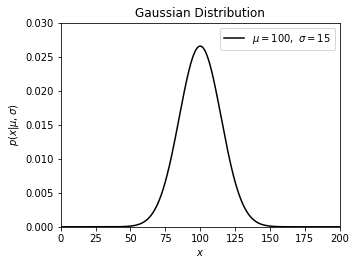

In [2]:
## Let's play with Gaussians! Or Normal distributions, N(mu,sigma)
## see http://www.astroml.org/book_figures/chapter3/fig_gaussian_distribution.html
## Example: IQ is (by definition) distributed as N(mu=100,sigma=15)
## Let's plot the IQ distribution first
# generate distribution for a grid of x values
x = np.linspace(0, 200, 1000)
mu=100
sigma=15
gauss = norm(mu, sigma).pdf(x)  # this is a function of x: gauss(x)
# actual plotting
fig, ax = plt.subplots(figsize=(5, 3.75))
plt.plot(x, gauss, ls='-', c='black', label=r'$\mu=%i,\ \sigma=%i$' % (mu, sigma))
plt.xlim(0, 200)
plt.ylim(0, 0.03)
plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')
plt.legend()
plt.show()

In [3]:
## above we used probability density function (astronomers like to call it "differential" df)
## the cumulative distribution function, cdf, is the integral of pdf from $x'=-\infty$ to $x'=x$
# What fraction of people have IQ>145?
gaussCDF = norm(mu, sigma).cdf(145)
print (1-gaussCDF)

0.00134989803163


In [4]:
# What IQ corresponds to "one in a million"? 
nSigma = norm.ppf(1-1.0e-6)
# norm.ppf returns x for specified cdf, assuming mu=0 and sigma=1 ("standard normal pdf")
IQ = mu + nSigma*sigma
print('nSigma=',nSigma)
print('IQ=', IQ)

nSigma= 4.75342430882
IQ= 171.301364632


In [5]:
# let's now look at the same problems using a sample of million points drawn from N(100,15)
sampleSize=1000000 
gaussSample = norm(mu, sigma).rvs(sampleSize) 
# What fraction of people have IQ>145?
smartOnes = gaussSample[gaussSample>145]
print (1.0*np.size(smartOnes)/sampleSize)

0.001362


In [6]:
# What IQ corresponds to "one in a million"?  
print(np.max(gaussSample))

167.00835032


In [7]:
def printStats(v):
    print('Size:', np.size(v))
    print('min:', np.min(v))
    print('max:', np.max(v))
    print('mean:', np.mean(v))
    print('median:', np.median(v))
    print('st.dev.:', np.std(v))

In [8]:
printStats(gaussSample)

Size: 1000000
min: 28.3911790113
max: 167.00835032
mean: 99.9767720334
median: 99.9769708439
st.dev.: 15.0069942598


In [9]:
printStats(smartOnes)

Size: 1362
min: 145.002333704
max: 167.00835032
mean: 149.192270209
median: 148.23390171
st.dev.: 3.75669754702


In [10]:
# What about the other end of the spectrum?
print('N(50 < IQ < 71):    ', np.size(gaussSample[(gaussSample>50) & (gaussSample<71)]))
print('N(26 < IQ < 51):    ', np.size(gaussSample[(gaussSample>26) & (gaussSample<51)]))

N(50 < IQ < 71):     26260
N(26 < IQ < 51):     555


### Gaussian confidence levels

The probability of a measurement drawn from a Gaussian distribution that is between $\mu-a$ and $\mu+b$ is
$$\int_{\mu-a}^{\mu+b} p(x|\mu,\sigma) dx.$$
For $a=b=1\sigma$, we get the familar result of 68.3%.  For $a=b=2\sigma$ it is 95.4%.  So we refer to the range $\mu \pm 1\sigma$ and $\mu \pm 2\sigma$ as the 68% and 95% **confidence limits**, respectively.

In [11]:
## now let's go back to the problem of estimating location and scale
## given a sample, such as gaussSample above, how do we estimate its mu and sigma?

![SlideGrab](figures/p4.jpg)

![SlideGrab](figures/p3.jpg)

### Sample vs. Population Statistics 

Statistics estimated from the *data* are called _sample statistics_ as compared to _population statistics_ which come from knowing the functional form of the pdf. For example, the expectation value for a known h(x) is

$$\mu \equiv E(x) = \int_{-\infty}^{\infty} x h(x) dx,$$

where $h(x)$ must be properly normalized (the integral gets replaced by a sum for discrete distributions).

E(x) is the expecation value of $x$.  If you want the expectation value of something else--say $x^2$ or $(x-\mu)^2$, you replace $x$ with that. Importantly, the *variance* is the expectation value of $(x-\mu)^2$

$$\sigma^2 \equiv V = \int_{-\infty}^{\infty}  (x-\mu)^2 h(x) dx,$$

where, again, the integral gets replaced by a sum for discrete distributions.

Specifically, $\mu$ is the *population average*, i.e., it is the expecation value of $x$ for $h(x)$.  But we don't *know* $h(x)$! So we do the next best thing, and estimate it from the data:

$$ \hat{h}(x) = \sum_{i=1}^N \frac{\delta_(x - x_i)}{N}$$

Plugging into the previous equations, we derive the **sample mean**, $\overline{x}$ as an *estimator* of $\mu$ and defined as
$$\overline{x} \equiv \frac{1}{N}\sum_{i=1}^N x_i,$$
which we determine from the data itself. We'll hear more about estimators in Week 4.

Similarly, the **sample variance** ($s^2$, where 
$s$ is the sample standard deviation) is an *estimator* of $\sigma^2$:
$$s^2 \equiv \frac{1}{N-1}\sum_{i=1}^N (x_i-\overline{x})^2.$$

**WAIT!!!** Why do we have (N-1) and not N (as in expression for the mean)???

The reason for the (N-1) term instead of the naively expected N in the second expression is related to the fact that $\overline{x}$ is also determined from data (we will discuss this subtle fact and the underlying statistical justification for the (N-1) term in more detail in Week 4 lectures. With N replaced by (N-1) (the so-called Bessel’s correction), the sample variance (i.e., $\sigma^2$) becomes unbiased (and the sample standard deviation becomes a less biased, but on average still underestimated, estimator of the true standard deviation). 

What does "biased" mean? 

![SlideGrab](figures/p13.jpg)

![SlideGrab](figures/p10.jpg)

![SlideGrab](figures/p11.jpg)

![SlideGrab](figures/p12.jpg)

![SlideGrab](figures/p8.jpg)

Anscombe's quartet comprises four datasets that have nearly identical simple descriptive statistics, yet appear very different when graphed. 

![SlideGrab](figures/AnscombeQuartet.jpg)

![SlideGrab](figures/AnscombeQuartetTable.jpg)



## Central Limit Theorem

In [12]:
# Execute this cell
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats

### Uncertainty for the mean and the sample standard deviation

Last time we introduced the uncertainty of our estimates of $\overline{x}$ and $s$: 

$$ \sigma_{\overline{x}} = \frac{s}{\sqrt{N}},$$

which we call the *standard error of the mean*, and the uncertainty of $s$:

$$\sigma_s = \frac{s}{\sqrt{2(N-1)}} = \frac{1}{\sqrt{2}}\sqrt{\frac{N}{N-1}}\sigma_{\overline{x}}.$$

Note that for large $N$, $\sigma_{\overline{x}} \sim \sqrt{2}\sigma_s$ and for small $N$, $\sigma_s$ is not much smaller than $s$.

### Standard Error vs. Standard Deviation

Note the difference between the ***standard deviation*** and and the ***standard error***. The former describes the property of the distribution we're attempting to estimate (i.e., how far is a typical individual sample away from the sample mean); the latter describes the precision of our estimate of some quantity (e.g., the mean itself).

Example:
* An average human is 1.65m (female) and 1.78 (male) tall. With enough measurements, the error of that estimate of the mean can get almost arbitrarily small.
* Human height is approximately normally distributed, with a standard deviation of $9-10$ cm. No matter how many measurements we perform, the that standard deviation will not reduce -- it's the property of the population (and sample).

Fun fact: *"The people of the Dinaric Alps mainly South Slavs (Montenegro and East Herzegovina [and Croatia]) are on record as being the tallest in the world, with a male average height of 185.6 cm (6 ft 1.1 in) and female average height of 170.9 cm (5 ft 7.3 in)."* -- Wikipedia

### Visualizing the standard error

Let's see how it looks in practice by doing a few numerical experiments: we'll:

* draw $k=10$ numbers from $N(\mu=1.0, \sigma=0.1)$ and compute their mean
* repeat this computation M=10,000 times and plot the distribution of these M means

Will this distribution well described by $N(1.0, \frac{0.1}{\sqrt{k}})$?

/scratch/darko/devel/new_oct18/lsstsw/miniconda/envs/lsst-scipipe/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


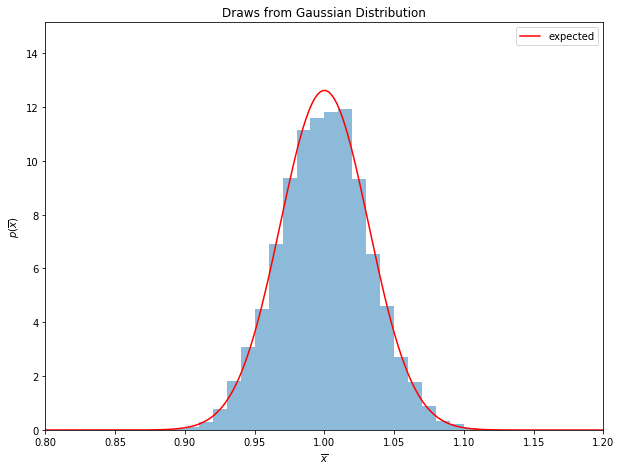

In [13]:
np.random.seed(42)
k = 10
M = 10000
mu = 1.0
sigma = 0.1
means = np.zeros(M)  # for storing the mean values obtained in M draws
for i in range(M):
    x = norm(mu, sigma).rvs(k) # here we draw k numbers from N(mu=1.0, sigma=0.1)
    means[i] = np.mean(x)
## now plot the histogram of values in array means
fig, ax = plt.subplots(figsize=(10, 7.5))
# histogram the data
ax.hist(means, bins=np.linspace(0.8, 1.2, 41),
            histtype='stepfilled', alpha=0.5, normed=True)
# expected gaussian distribution
xGrid = np.linspace(0, 2, 1000)
gauss = norm(mu, sigma/np.sqrt(k)).pdf(xGrid)  # this is a function of x: gauss(x)
plt.plot(xGrid, gauss, ls='-', c='red', label='expected')

plt.xlim(0.8, 1.2)
yMax = 1.2*np.sqrt(k)/np.sqrt(2*3.14) / sigma 
plt.ylim(0, yMax)
plt.xlabel('$\overline{x}$')
plt.ylabel(r'$p(\overline{x})$')
plt.title('Draws from Gaussian Distribution')
plt.legend()
plt.show()

What if we don't draw from a gaussian distribution, but instead from a uniform distribution?

Let's first see one (largish) sample drawn from uniform distribution.

st.dev.= 0.10026144448


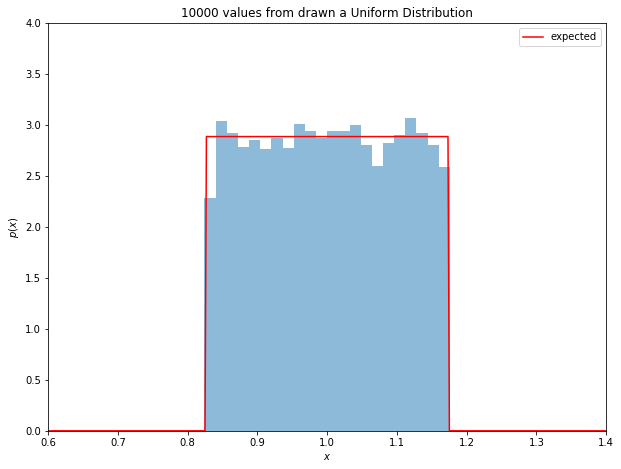

In [14]:
k = 10
M = 10000
mu = 1.0
sigma = 0.1
W = sigma*np.sqrt(12.0)  # same standard deviation as for gaussian
left = mu - 0.5 * W    
x = uniform(left, W).rvs(10000) # here we draw 10000 numbers between 0.8268 and 1.1732
print('st.dev.=',np.std(x))
# now plot the histogram of values in array means
fig, ax = plt.subplots(figsize=(10, 7.5))
# histogram the data
ax.hist(x, bins=np.linspace(0.6, 1.4, 51),
            histtype='stepfilled', alpha=0.5, normed=True)
# expected uniform distribution
xGrid = np.linspace(0, 2, 1000)
flat = uniform(left,W).pdf(xGrid)  # this is a function of x: gauss(x)
plt.plot(xGrid, flat, ls='-', c='red', label='expected')
plt.xlim(0.6, 1.4)
plt.ylim(0, 4)
plt.xlabel('$x$')
plt.ylabel(r'$p(x)$')
plt.title('10000 values from drawn a Uniform Distribution')
plt.legend()
plt.show()

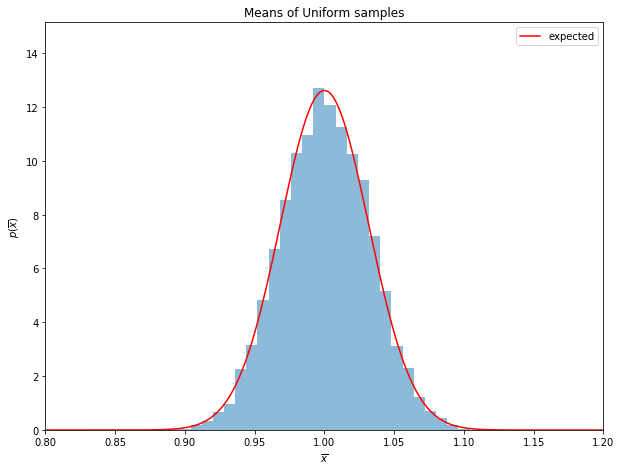

In [15]:
### what if we don't draw from a gaussian distribution, but instead from a uniform distribution?
# 2) draw k=10 numbers from a uniform distribution U(mu=1.0, W) and compute their mean; repeat this 
#    computation M=1000 times and plot the distribution of these M means; is this
#    distribution well described by N(1.0, 0.1/sqrt(k))? 
means = np.zeros(M)  # for storing the mean values obtained in M draws
for i in range(M):
    x = uniform(left, W).rvs(k) # here we draw k numbers between 0.8268 and 1.1732  
    means[i] = np.mean(x)
# now plot the histogram of values in array means
fig, ax = plt.subplots(figsize=(10, 7.5))
# histogram the data
ax.hist(means, bins=np.linspace(0.8, 1.2, 51),
            histtype='stepfilled', alpha=0.5, normed=True)
# expected gaussian distribution
x = np.linspace(0, 2, 1000)
gauss = norm(mu, sigma/np.sqrt(k)).pdf(x)  # this is a function of x: gauss(x)
plt.plot(x, gauss, ls='-', c='red', label='expected')
plt.xlim(0.8, 1.2)
yMax = 1.2*np.sqrt(k)/np.sqrt(2*3.14) / sigma 
plt.ylim(0, yMax)
plt.xlabel('$\overline{x}$')
plt.ylabel(r'$p(\overline{x})$')
plt.title('Means of Uniform samples')
plt.legend()
plt.show()

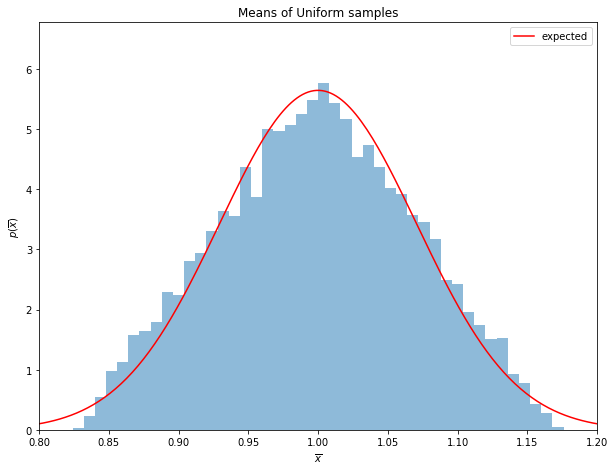

In [16]:
### this is becoming interesting: it looks like it doesn't matter from which 
### distribution we draw our sample! Does it depend on the sample size? 
# 3) draw now k=2 numbers from U(mu=1.0, W=2.0) 
k = 2
means = np.zeros(M)  # for storing the mean values obtained in M draws
for i in range(M):
    x = uniform(left, W).rvs(k) # here we draw k numbers between 0.8268 and 1.1732  
    means[i] = np.mean(x)
# now plot the histogram of values in array means
fig, ax = plt.subplots(figsize=(10, 7.5))
# histogram the data
ax.hist(means, bins=np.linspace(0.8, 1.2, 51),
            histtype='stepfilled', alpha=0.5, normed=True)
# expected gaussian distribution
x = np.linspace(0, 2, 1000)
gauss = norm(mu, sigma/np.sqrt(k)).pdf(x)  # this is a function of x: gauss(x)
plt.plot(x, gauss, ls='-', c='red', label='expected')
plt.xlim(0.8, 1.2)
yMax = 1.2*np.sqrt(k)/np.sqrt(2*3.14) / sigma 
plt.ylim(0, yMax)
plt.xlabel('$\overline{x}$')
plt.ylabel(r'$p(\overline{x})$')
plt.title('Means of Uniform samples')
plt.legend()
plt.show()

Now it is not such a good agreement any more!!

The blue histogram seems limited to the range from 0.83 to 1.17, why? 

![SlideGrab](figures/p6.jpg) 

A nice (online) proof of the CLT: http://www.cs.toronto.edu/~yuvalf/CLT.pdf

![SlideGrab](figures/p7.jpg) 

## Robust Statistics

![SlideGrab](figures/p22.jpg) 

While it is perhaps most common to compute the mean, the median is a more *robust* estimator of the (true) mean location of the distribution.  That's because it is less affected by outliers.

In [17]:
# Execute this cell.  Think about what it is doing.
data = norm(0.5, 0.1).rvs(10000)
mean = np.mean(data)
median = np.median(data)
stdev = np.std(data)
mask = data>0.7
print('the number of modified points:', np.sum(mask))
data[mask] = data[mask]*10
newmean = np.mean(data)
newmedian = np.median(data)
newstdev = np.std(data)
print('mean:', mean, newmean)
print('median:', median, newmedian)
print('st.dev.:', stdev, newstdev)

the number of modified points: 220
mean: 0.498583695707 0.644702573142
median: 0.499883249826 0.499883249826
st.dev.: 0.100467123235 1.01580286259


### Percentiles and quartiles

Percentiles, $q_p$, are computed as
$$\frac{p}{100} = \int_{-\infty}^{q_p}h(x) dx$$

For example, the 25th, 50th, and 75th percentiles:

In [18]:
# execute:
mu=100
sigma=15
sampleSize=1000000
data = norm(mu, sigma).rvs(sampleSize) 
# %timeit data = norm(mu, sigma).rvs(sampleSize) 
q25 = np.percentile(data, 25)
q50 = np.percentile(data, 50)
# %timeit q50 = np.percentile(data, 50)
q75 = np.percentile(data, 75)
print(q25, q50, q75)

89.840400814 99.9910326359 110.110606209


In [19]:
# execute:
%timeit mean = np.mean(data)
%timeit median = np.median(data)

mean = np.mean(data)
median = np.median(data)
print (mean, median)

666 µs ± 44.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
12.4 ms ± 289 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
99.9805286797 99.9910326359


The difference between the 25th and 75th percentiles, $q_{75} - q_{25}$, is called the *interquartile range*.

The median and interquartile range are more _robust_ estimators of the location and scale parameters 
than the mean and standard deviation.  So, one can create a robust standard deviation like estimator,
from the interquartile range as

$$\sigma_G = 0.7413(q_{75} - q_{25}).$$

The normalization (0.7413) makes it *unbiased* estimator of standard deviation in case of a Gaussian.

![SlideGrab](figures/p24.jpg)  

In [20]:
# execute
%timeit sigmaG = astroMLstats.sigmaG(data)
%timeit stdev = np.std(data)

15.8 ms ± 861 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.21 ms ± 804 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
# execute
print(astroMLstats.sigmaG(data), np.std(data))

15.0263257437 15.0132216972


### Mode

The mode is the most probable value, determined from the peak of the distribution, which is the value where the derivative is 0:

$$ \left(\frac{dh(x)}{dx}\right)_{x_m} = 0$$

The mode can be estimated (at least for a Gaussian distribution) as

$$x_m = 3q_{50} - 2\mu$$

In [22]:
# Execute this cell
mode = 3*q50 - 2*mean
print(mode, mean, median)

100.012040548 99.9805286797 99.9910326359


## Some Important Distributions

If we are attempting to characterize our data in a way that is **parameterized**, then we need a functional form or a **distribution**.  There are many naturally occurring distributions.  The book goes through quite a few of them.  Here we'll just talk about a few basic ones to get us started.


### Uniform Distribution

The uniform distribution is perhaps more commonly called a "top-hat" or a "box" distribution.  It is specified by a mean, $\mu$, and a width, $W$, where

$$p(x|\mu,W) = \frac{1}{W}$$

over the range $|x-\mu|\le \frac{W}{2}$ and $0$ otherwise.  That says that "given $\mu$ AND $W$, the probability of $x$ is $\frac{1}{W}$" (as long as we are within a certain range).

Since we are used to thinking of a Gaussian as the *only* type of distribution the concept of $\sigma$ (aside from the width) may seem strange.  But $\sigma$ as mathematically defined above applies here and
$$\sigma = \frac{W}{\sqrt{12}}.$$


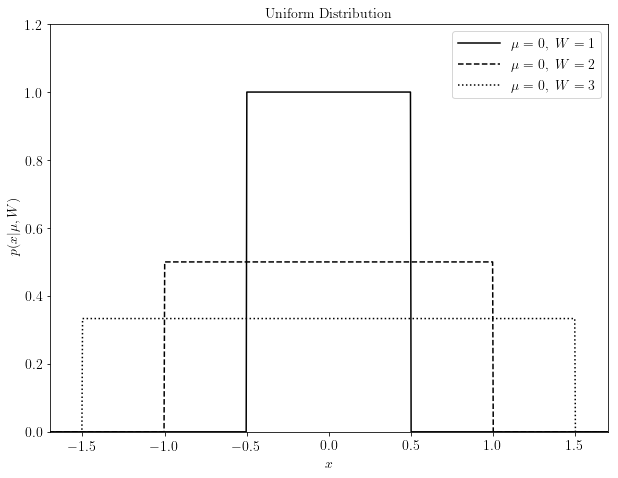

In [23]:
# Execute this cell
%matplotlib inline
%run code/fig_uniform_distribution.py

### Log Normal

Note that if $x$ is Gaussian distributed with $\mathscr{N}(\mu,\sigma)$, then $y=\exp(x)$ will have a **log-normal** distribution, where the mean of y is $\exp(\mu + \sigma^2/2)$.  Try it.

### $\chi^2$ Distribution

We'll run into the $\chi^2$ distribution when we talk about Maximum Likelihood in the next chapter.

If we have a Gaussian distribution with values ${x_i}$ and we scale and normalize them according to

$$z_i = \frac{x_i-\mu}{\sigma},$$

then the sum of squares, $Q$ 

$$Q = \sum_{i=1}^N z_i^2,$$

will follow the *$\chi^2$ distribution with $k$ degrees of freedom* (see next slide for discussion of $k$).

The *number of degrees of freedom*, $k$ is given by the number of data points, $N$ (minus any constraints).  The pdf of $Q$ given $k$ defines the $\chi^2$ distribution and is given by

$$p(Q|k)\equiv \chi^2(Q|k) = \frac{1}{2^{k/2}\Gamma(k/2)}Q^{k/2-1}\exp(-Q/2),$$

where $Q>0$ and the $\Gamma$ function would just be the usual factorial function if we were dealing with integers, but here we have half integers.

This is ugly, but it is really just a formula like anything else.  Note that the shape of the distribution *only* depends on the sample size $N=k$ and not on $\mu$ or $\sigma$.  

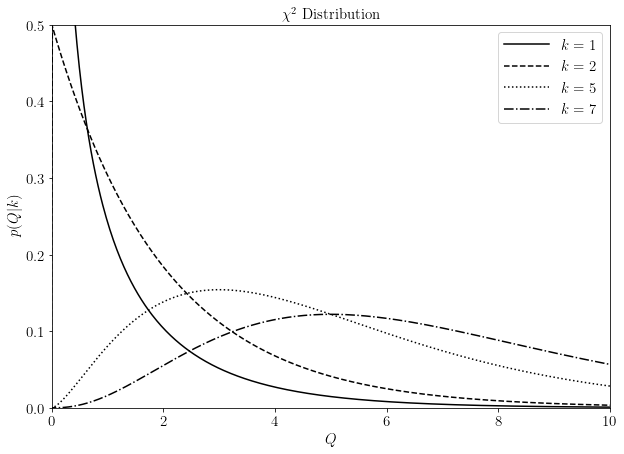

In [24]:
# Execute this cell
%run code/fig_chi2_distribution.py

### Chi-squared per degree of freedom

For large $k$ (say, $k > 10$ or so), $\chi^2$-distribution becomes well approximated by the Normal distribution (Gaussian):

$$ p(\chi^2|k) \sim N(\chi^2 | k, \sqrt{2k}) $$

In practice we frequently divide $\chi^2$ by the number of degrees of freedom, and work with:

$$\chi^2_{dof} = \frac{1}{N-1} \sum_{i=1}^N \left(\frac{x_i-\overline{x}}{\sigma}\right)^2$$

which is distributed as

$$ p(\chi^2_{dof}) \sim N\left(\chi^2_{dof} \rvert 1, \sqrt{\frac{2}{N-1}}\right) $$

(where $k = N-1$, and $N$ is the number of samples). Therefore, we expect $\chi^2_{dof}$ to be 1, to within a few $\sqrt{\frac{2}{N-1}}$.

![SlideGrab](figures/p19.jpg) 

![SlideGrab](figures/p20.jpg) 

![SlideGrab](figures/p25.jpg) 

## Multivariate distributions

## Bivariate and Multivariate Distribution Functions

Up to now we have been dealing with one-dimensional distribution functions.  Let's now consider a two dimensional distribution $h(x,y)$ where $$\int_{-\infty}^{\infty}dx\int_{-\infty}^{\infty}h(x,y)dy = 1.$$  $h(x,y)$ is telling us the probability that $x$ is between $x$ and $dx$ and *also* that $y$ is between $y$ and $dy$.

Then we have the following definitions:

$$\sigma^2_x = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(x-\mu_x)^2 h(x,y) dx dy$$

$$\sigma^2_y = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(y-\mu_y)^2 h(x,y) dx dy$$

$$\mu_x = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}x h(x,y) dx dy$$

$$\sigma_{xy} = Cov(x,y) = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(x-\mu_x) (y-\mu_y) h(x,y) dx dy$$

If $x$ and $y$ are uncorrelated, then we can treat the system as two independent 1-D distributions.  This means that choosing a range on one variable has no effect on the distribution of the other.

We can write a 2-D Gaussian pdf as
$$p(x,y|\mu_x,\mu_y,\sigma_x,\sigma_y,\sigma_{xy}) = \frac{1}{2\pi \sigma_x \sigma_y \sqrt{1-\rho^2}} \exp\left(\frac{-z^2}{2(1-\rho^2)}\right),$$

where $$z^2 = \frac{(x-\mu_x)^2}{\sigma_x^2} + \frac{(y-\mu_y)^2}{\sigma_y^2} - 2\rho\frac{(x-\mu_x)(y-\mu_y)}{\sigma_x\sigma_y},$$

with $$\rho = \frac{\sigma_{xy}}{\sigma_x\sigma_y}$$
as the (dimensionless) correlation coefficient.

If $x$ and $y$ are perfectly correlated then $\rho=\pm1$ and if they are uncorrelated, then $\rho=0$.

The pdf is now not a histogram, but rather a series of contours in the $x-y$ plane.   These are centered at $(x=\mu_x, y=\mu_y)$ and are tilted at angle $\alpha$, which is given by
$$\tan(2 \alpha) = 2\rho\frac{\sigma_x\sigma_y}{\sigma_x^2-\sigma_y^2} = 2\frac{\sigma_{xy}}{\sigma_x^2-\sigma_y^2}.$$

For example (Figure 3.22 from the textbook):
![Figure 3.22](http://www.astroml.org/_images/fig_bivariate_gaussian_1.png)

We can define new coordinate axes that are aligned with the minimum and maximum widths of the distribution.  These are called the **principal axes** and are given by
$$P_1 = (x-\mu_x)\cos\alpha + (y-\mu_y)\sin\alpha,$$
and
$$P_2 = -(x-\mu_x)\sin\alpha + (y-\mu_y)\cos\alpha.$$

The widths in this coordinate system are
$$\sigma^2_{1,2} = \frac{\sigma_x^2+\sigma_y^2}{2}\pm\sqrt{\left(\frac{\sigma_x^2-\sigma_y^2}{2}\right)^2 + \sigma^2_{xy}}.$$

Note that the correlation vanishes in this coordinate system and the bivariate Gaussian is just a product of two univariate Gaussians.  This concept will be crucial for understanding Principal Component Analysis when we get to Chapter 7, where PCA extends this idea to even more dimensions.

In the univariate case we used $\overline{x}$ and $s$ to *estimate* $\mu$ and $\sigma$.  In the bivariate case we estimate 5 parameters: $(\overline{x},\overline{y},s_x,s_y,s_{xy})$.  

As with the univariate case, it is important to realize that outliers can bias these estimates and that it may be more appropriate to use the median rather than the mean as a more robust estimator for $\mu_x$ and $\mu_y$.  Similarly we want robust estimators for the other parameters of the fit.  We won't go into that in detail right now, but see Figure 3.23 from the textbook for an example:

![Ivezic, Figure 3.23](http://www.astroml.org/_images/fig_robust_pca_1.png)

For an example of how to generate a bivariate distribution and plot confidence contours, execute the following cell.

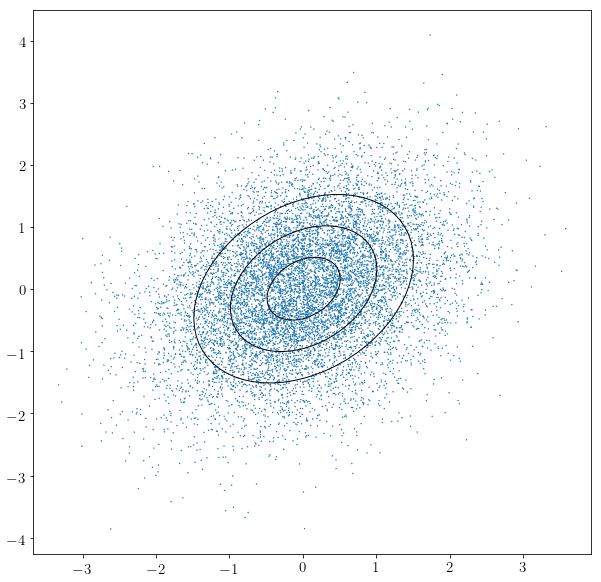

In [25]:
# Base code drawn from the textbook, Figure 3.22, edited by G. Richards to simplify the example
from matplotlib.patches import Ellipse
from astroML.stats.random import bivariate_normal
from astroML.stats import fit_bivariate_normal

#------------------------------------------------------------
# Create 10,000 points from a multivariate normal distribution
mean = [0, 0]
cov = [[1, 0.3], [0.3, 1]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

# Fit those data with a bivariate normal distribution
mean, sigma_x, sigma_y, alpha = fit_bivariate_normal(x,y)

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

plt.scatter(x,y,s=2,edgecolor='none')

# draw 1, 2, 3-sigma ellipses over the distribution
for N in (1, 2, 3):
    ax.add_patch(Ellipse(mean, N * sigma_x, N * sigma_y, angle=alpha * 180./np.pi, lw=1, ec='k', fc='none'))

## Histograms

![SlideGrab](figures/p27.jpg) 

![SlideGrab](figures/p28.jpg) 

![SlideGrab](figures/p29.jpg) 

![SlideGrab](figures/p30.jpg) 

![SlideGrab](figures/p31.jpg) 

![SlideGrab](figures/p32.jpg) 

(array([  5.,   6.,  17.,  21.,  23.,  18.,   9.,   1.]),
 array([  63.27170082,   72.52224536,   81.77278989,   91.02333443,
         100.27387896,  109.5244235 ,  118.77496803,  128.02551257,
         137.2760571 ]),
 <a list of 1 Patch objects>)

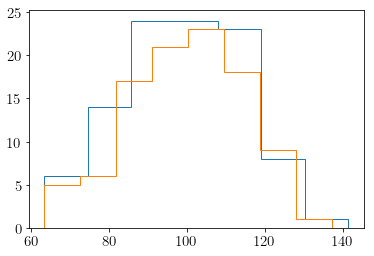

In [26]:
from astroML.plotting import hist as fancyhist
x = norm(100, 15).rvs(100)
fancyhist(x, bins="scott", histtype="step")
fancyhist(x, bins="freedman", histtype="step")

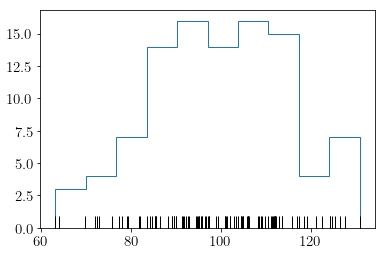

In [27]:
plt.hist(x,histtype="step")
plt.plot(x, 0*x, '|', color='k', markersize=25) # N.B. markersize is in *points*

We will learn more tricks later in class (Week 9), see

http://www.astroml.org/book_figures/chapter6/fig_GMM_density_estimation.html